In [193]:
%run Leer_catalogos.ipynb

[*] => catalogue <= [*]
       Cantidad de datos: 162019 (tablas/Fornax_VAC_RUN1+RUN2_gal_mag_err_XY_mumax_flags_no_Vr.fits)
       Cantidad de datos: 2684438 (tablas/Fornax_VAC_RUN1+RUN2.fits)
[*] => Fornax <= [*]
       Cantidad de datos: 1146 (FornaxMil)
       Cantidad de datos: 232 (FornaxVR)
[*] => Background <= [*]
       Cantidad de datos: 57377 (SpecZ)
[*] => results <= [*]
       Cantidad de datos: 59716 (results)
[*] => ApJS26557P <= [*]
       Cantidad de datos: 5404 (ApJS26557P)
[*] => Luisa <= [*]
       Cantidad de datos: 115789 (Luisa)


# Merge entre Luisa y las Runs

In [196]:
Runs.head(1)

,ID,Field,RA,DEC,X_IMAGE,Y_IMAGE,THETA_IMAGE,ERRTHETA_IMAGE,A_IMAGE,ERRA_IMAGE,...,FLUX_RADIUS_50_Z,FLUX_RADIUS_70_Z,FLUX_RADIUS_90_Z,FLUX_MAX_Z,SNR_WIN_Z,MU_THRESHOLD_Z,THRESHOLD_Z,MU_MAX_Z,CLASS_STAR_Z,BACKGROUND_Z
0,iDR4_FORNAX_RUN2_SPLUS-s24s28.00001,b'SPLUS-s24s28',41.608257,-30.650056,10214.817383,7134.221191,-63.134846,-60.85778,1.843448,0.104682,...,2.408651,3.363835,4.626714,0.838782,19.598148,22.791866,0.246654,20.878691,0.0163,0.000539


In [202]:
Luisa.head(1)

,ID,Field,RA,DEC,X_IMAGE,Y_IMAGE,THETA_IMAGE,ERRTHETA_IMAGE,A_IMAGE,ERRA_IMAGE,...,MASS_SUP,SFR_BEST,SFR_INF,SFR_SUP,SSFR_BEST,SSFR_INF,SSFR_SUP,LUM_NUV_BEST,LUM_R_BEST,LUM_K_BEST
0,iDR4_FORNAX_RUN1_SPLUS-s24s28.00693,SPLUS-s24s28,41.642773,-30.451056,10029.801,8438.295,-34.661777,-40.89227,1.976198,0.083128,...,8.75663,-99.0,-4.71584,-2.12088,-107.792,-14.0101,-10.6924,5.5248,7.4388,6.95698


In [212]:
Runs_and_Luisa = Runs.merge ( Luisa.drop_duplicates(), on = ['ID'], how = 'right', indicator = True, suffixes = ('_Runs', '_Luisa') )

In [213]:
merge_Runs_and_Luisa = Runs_and_Luisa[Runs_and_Luisa['_merge'] == 'both' ]
Notin_Runs_and_InLuisa = Runs_and_Luisa[Runs_and_Luisa['_merge'] == 'right_only' ]

In [214]:
merge_Runs_and_Luisa

,ID,Field_Runs,RA_Runs,DEC_Runs,X_IMAGE_Runs,Y_IMAGE_Runs,THETA_IMAGE_Runs,ERRTHETA_IMAGE_Runs,A_IMAGE_Runs,ERRA_IMAGE_Runs,...,SFR_BEST,SFR_INF,SFR_SUP,SSFR_BEST,SSFR_INF,SSFR_SUP,LUM_NUV_BEST,LUM_R_BEST,LUM_K_BEST,_merge
0,iDR4_FORNAX_RUN1_SPLUS-s24s28.00693,b'SPLUS-s24s28',41.642773,-30.451056,10029.800781,8438.294922,-34.661777,-40.892269,1.976198,0.083128,...,-99.00000,-4.71584,-2.12088,-107.79200,-14.01010,-10.69240,5.52480,7.43880,6.95698,both
1,iDR4_FORNAX_RUN1_SPLUS-s24s28.00708,b'SPLUS-s24s28',41.643847,-30.451211,10023.733398,8437.326172,-68.758591,-64.579773,1.743396,0.065278,...,-99.00000,-4.13047,-3.04962,-107.01000,-13.94360,-10.79410,4.44304,6.54774,6.16882,both
2,iDR4_FORNAX_RUN1_SPLUS-s24s28.00838,b'SPLUS-s24s28',41.650450,-30.290130,9993.983398,9492.077148,-27.105394,-22.668581,2.576553,0.070909,...,-99.00000,-4.99495,-2.51794,-108.11900,-14.22810,-11.50040,5.55151,7.65620,7.27729,both
8,iDR4_FORNAX_RUN1_SPLUS-s24s28.04755,b'SPLUS-s24s28',41.873621,-30.475619,8726.242188,8285.428711,71.031090,75.642990,1.747509,0.086203,...,-4.62562,-2.97341,-1.96146,-12.19850,-11.27220,-9.62237,5.91877,7.04807,6.33585,both
11,iDR4_FORNAX_RUN1_SPLUS-s24s28.07073,b'SPLUS-s24s28',41.998620,-31.324323,7998.798340,2733.273682,23.158604,28.334269,1.903800,0.081105,...,-99.00000,-5.05792,-3.83055,-106.24800,-14.15760,-10.88200,3.68075,5.78545,5.40653,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115784,iDR4_FORNAX_RUN2_SPLUS-s32s33.13308,b'SPLUS-s32s33',58.135134,-41.392040,1465.507690,5854.657715,-75.872238,-76.707085,2.271017,0.111201,...,-2.14293,-2.85271,-1.93963,-10.23170,-11.24990,-9.72142,6.75001,7.07260,6.52319,both
115785,iDR4_FORNAX_RUN2_SPLUS-s32s33.13324,b'SPLUS-s32s33',58.137294,-42.061347,1496.602295,1473.433838,-33.525635,-38.785397,2.347694,0.096582,...,-2.16422,-1.94188,-1.57276,-9.57367,-9.67969,-8.96373,7.05527,7.21877,6.36425,both
115786,iDR4_FORNAX_RUN2_SPLUS-s32s33.13371,b'SPLUS-s32s33',58.144378,-41.707244,1439.917603,3791.035156,-64.451035,-65.697174,2.436994,0.093230,...,-2.83929,-4.50909,-1.84168,-11.82530,-13.99330,-10.67850,6.29404,7.71143,7.20442,both
115787,iDR4_FORNAX_RUN2_SPLUS-s32s33.13372,b'SPLUS-s32s33',58.144598,-41.697928,1438.260132,3852.003418,42.349850,42.694832,3.464082,0.062333,...,-99.00000,-4.44255,-1.67591,-108.49500,-14.29280,-11.13180,6.52528,8.21927,7.59636,both


In [215]:
Notin_Runs_and_InLuisa

,ID,Field_Runs,RA_Runs,DEC_Runs,X_IMAGE_Runs,Y_IMAGE_Runs,THETA_IMAGE_Runs,ERRTHETA_IMAGE_Runs,A_IMAGE_Runs,ERRA_IMAGE_Runs,...,SFR_BEST,SFR_INF,SFR_SUP,SSFR_BEST,SSFR_INF,SSFR_SUP,LUM_NUV_BEST,LUM_R_BEST,LUM_K_BEST,_merge
3,iDR4_FORNAX_RUN1_SPLUS-s24s28.00916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-99.00000,-5.00766,-2.31790,-107.9410,-14.2195,-11.01350,5.37401,7.47870,7.09979,right_only
4,iDR4_FORNAX_RUN1_SPLUS-s24s28.01968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-99.00000,-4.98283,-2.44546,-108.1890,-14.1522,-11.47710,5.62181,7.72650,7.34759,right_only
5,iDR4_FORNAX_RUN1_SPLUS-s24s28.02095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-99.00000,-5.34947,-3.14841,-107.1730,-14.1427,-11.15330,4.60607,6.71077,6.33185,right_only
6,iDR4_FORNAX_RUN1_SPLUS-s24s28.04633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-99.00000,-4.99469,-2.31235,-107.9630,-14.2308,-11.03310,5.39586,7.50055,7.12164,right_only
7,iDR4_FORNAX_RUN1_SPLUS-s24s28.04750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-99.00000,-5.33842,-3.29894,-107.0870,-14.1332,-11.22280,4.51951,6.62420,6.24529,right_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115540,iDR4_FORNAX_RUN2_SPLUS-s32s33.10307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-99.00000,-5.30147,-2.69405,-107.8700,-14.1169,-11.39910,5.30262,7.40731,7.02840,right_only
115560,iDR4_FORNAX_RUN2_SPLUS-s32s33.10548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.83106,-1.13849,-0.76238,-10.1439,-10.4409,-9.98935,8.09170,8.37250,7.72178,right_only
115617,iDR4_FORNAX_RUN2_SPLUS-s32s33.11277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-99.00000,-4.47882,-1.85579,-107.9940,-14.0511,-10.67210,6.02424,7.71824,7.09532,right_only
115680,iDR4_FORNAX_RUN2_SPLUS-s32s33.12038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.83691,-2.68234,-1.65055,-11.7234,-10.8742,-9.71394,6.38414,7.39483,6.66982,right_only


In [207]:
print ( len(merge_Runs_and_Luisa), len(Notin_Runs_and_InLuisa), len(Runs), len(Luisa) )

109352 6437 2684438 115789


In [208]:
109352 + 6437

115789

In [209]:
2684438 - 115789

2568649

Entiendo que la diferencia es porque Luisa corto el catalogo de Rodrigo en 0.045 (200 Mpc).

In [226]:
Runs_and_Luisa_and_results = results[['ID', 'RA', 'DEC', 'Prob (Fornax)']].merge ( merge_Runs_and_Luisa.drop(labels = ['_merge'], axis = 1), on = ['ID'], how = 'right', indicator = True, suffixes=('_Results', '_Runs_Luisa') )

In [230]:
merge_in_all = Runs_and_Luisa_and_results[Runs_and_Luisa_and_results['_merge'] == 'both' ]

In [242]:
merge_in_all

,ID,RA,DEC,Prob (Fornax),Field_Runs,RA_Runs,DEC_Runs,X_IMAGE_Runs,Y_IMAGE_Runs,THETA_IMAGE_Runs,...,SFR_BEST,SFR_INF,SFR_SUP,SSFR_BEST,SSFR_INF,SSFR_SUP,LUM_NUV_BEST,LUM_R_BEST,LUM_K_BEST,_merge
2,iDR4_FORNAX_RUN1_SPLUS-s24s28.00838,41.650450,-30.290130,0.30,b'SPLUS-s24s28',41.650450,-30.290130,9993.983398,9492.077148,-27.105394,...,-99.000000,-4.994950,-2.517940,-108.11900,-14.22810,-11.50040,5.55151,7.65620,7.27729,both
6,iDR4_FORNAX_RUN1_SPLUS-s24s28.07468,42.021039,-31.443769,0.24,b'SPLUS-s24s28',42.021039,-31.443769,7870.459473,1951.876831,-46.684559,...,-99.000000,-1.679810,-1.535230,-109.29600,-11.86750,-11.73040,6.72876,8.83345,8.45454,both
17,iDR4_FORNAX_RUN1_SPLUS-s24s28.24246,43.012528,-30.851982,0.22,b'SPLUS-s24s28',43.012528,-30.851982,2313.692627,5821.982422,1.906446,...,-2.257630,-4.634550,-1.917820,-11.50950,-14.38100,-11.10290,6.70137,7.94037,7.52095,both
18,iDR4_FORNAX_RUN1_SPLUS-s24s28.24811,43.045907,-30.786555,0.27,b'SPLUS-s24s28',43.045907,-30.786555,2123.807373,6249.264160,75.450409,...,-23.752000,-4.849110,-2.102070,-32.69780,-15.14660,-11.13490,5.70058,7.76967,7.31176,both
20,iDR4_FORNAX_RUN1_SPLUS-s24s29.03670,43.362089,-30.620240,0.51,b'SPLUS-s24s29',43.362089,-30.620240,9192.237305,7336.191406,-78.895462,...,-2.277160,-2.653760,-2.048120,-10.03230,-10.63340,-9.54824,6.65490,6.92329,6.16828,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109250,iDR4_FORNAX_RUN2_SPLUS-s32s33.12183,57.988013,-41.766023,0.56,b'SPLUS-s32s33',57.988013,-41.766023,2207.053955,3412.964844,68.200150,...,-0.588971,-0.679762,-0.520965,-10.91420,-11.01370,-10.82050,8.37601,9.16880,8.61479,both
109280,iDR4_FORNAX_RUN2_SPLUS-s32s33.12560,58.036960,-42.062964,0.49,b'SPLUS-s32s33',58.036960,-42.062964,1984.322754,1467.260498,-32.142204,...,-1.910480,-2.043340,-1.632500,-10.26920,-10.45160,-9.93559,7.03949,7.46218,6.73927,both
109283,iDR4_FORNAX_RUN2_SPLUS-s32s33.12569,58.038060,-42.088525,0.39,b'SPLUS-s32s33',58.038060,-42.088525,1980.379028,1299.881470,64.218750,...,-1.702920,-1.913490,-1.637760,-9.72207,-9.97285,-9.42545,7.18231,7.26081,6.61399,both
109313,iDR4_FORNAX_RUN2_SPLUS-s32s33.12892,58.079472,-42.068244,0.56,b'SPLUS-s32s33',58.079472,-42.068244,1778.023438,1430.896851,41.549675,...,-1.233110,-1.360440,-1.121390,-8.92017,-9.19517,-8.75417,7.67739,7.56398,6.62517,both


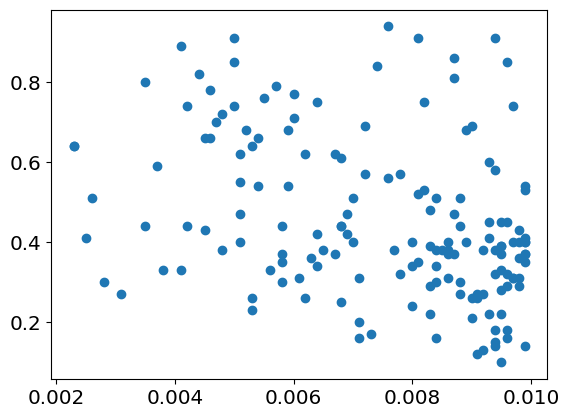

In [234]:
plt.scatter ( 'Z_ML', 'Prob (Fornax)', data = merge_in_all[ (merge_in_all['Z_ML'] > 0.002) & (merge_in_all['Z_ML'] < 0.01) ] ) 

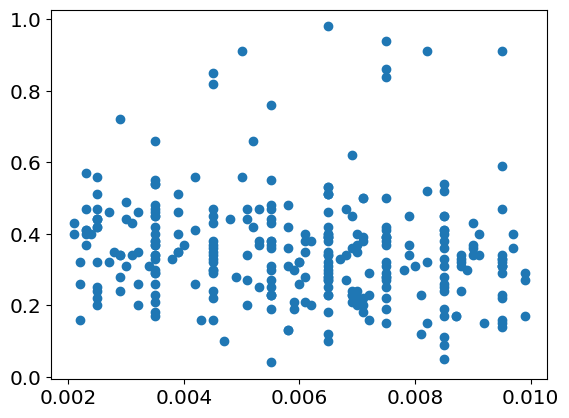

In [272]:
plt.scatter ( 'Z_BEST', 'Prob (Fornax)', data = merge_in_all[ (merge_in_all['Z_BEST'] > 0.002) & (merge_in_all['Z_BEST'] < 0.01) ] ) 

# CrossMatch entre el catalogo conjunto (prob, photo-z) con uno que tenga Vr

In [250]:
cat1 = merge_in_all
cat2 = FornaxVR

In [263]:
def CrossMatch(cat1, cat2, coor1 = ['RA', 'DEC'], coor2 = ['RA', 'DEC'], sep_min = 3 * u.arcsec):
    c2 = SkyCoord(cat2[coor2[0]], cat2[coor2[1]], unit = (u.deg, u.deg))
    c1 = SkyCoord(cat1[coor1[0]], cat1[coor1[1]], unit = (u.deg, u.deg))

    idx_c2, idx_c1, d2d, d3d = c1.search_around_sky ( c2, sep_min )

    cat2_match = cat2.iloc[ idx_c2 ]
    cat2_match.reset_index ( drop = True, inplace = True )
    cat1_match = cat1.iloc[ idx_c1 ]
    cat1_match.reset_index ( drop = True, inplace = True )

    Xmatch = pd.concat ( [cat1_match, cat2_match], axis = 1 )
    return Xmatch

In [319]:
cm_merge_in_all_and_FornaxVR = CrossMatch(cat1, cat2, coor1 = ['RA', 'DEC'], coor2 = ['RA_4', 'DEC_4'], sep_min = 20 * u.arcsec)

In [320]:
cm_merge_in_all_and_FornaxVR

,ID,RA,DEC,Prob (Fornax),Field_Runs,RA_Runs,DEC_Runs,X_IMAGE_Runs,Y_IMAGE_Runs,THETA_IMAGE_Runs,...,e_Vr,Vr_Ref,Ag,Ar,Ai,Az,RA_3,DEC_3,RA_4,DEC_4
0,iDR4_FORNAX_RUN1_SPLUS-s24s32.16621,49.063814,-31.209234,0.95,b'SPLUS-s24s32',49.063814,-31.209234,3651.994385,3488.915283,-13.692020,...,63.855803,20012dF...C...0000C,0.071,0.049,0.036,0.027,49.063583,-31.209472,49.063583,-31.209472
1,iDR4_FORNAX_RUN2_SPLUS-s25s32.10775,49.855654,-32.650510,0.73,b'SPLUS-s25s32',49.855654,-32.650510,2881.934814,2724.042969,87.607880,...,2.997925,2001A&A...376...98S,0.048,0.033,0.025,0.018,49.854166666666664,-32.65277777777778,49.854167,-32.652778
2,iDR4_FORNAX_RUN2_SPLUS-s29s31.05387,50.971077,-37.508757,0.93,b'SPLUS-s29s31',50.971077,-37.508757,5356.775879,5499.725098,82.762032,...,5.096472,2001A&A...376...98S,0.079,0.055,0.041,0.03,50.974999999999994,-37.51,50.975000,-37.510000
3,iDR4_FORNAX_RUN2_SPLUS-s25s34.01995,52.034554,-32.287533,0.28,b'SPLUS-s25s34',52.034554,-32.287533,8443.303711,5098.502441,15.721757,...,2.997925,1998A&AS..133..325G,0.047,0.032,0.024,0.018,52.02916666666667,-32.28611111111111,52.029167,-32.286111
4,iDR4_FORNAX_RUN2_SPLUS-s28s33.07110,53.400893,-36.138005,0.95,b'SPLUS-s28s33',53.400893,-36.138005,5143.373047,5847.885254,-54.964310,...,0.899378,1996ApJ...463...60B,0.067,0.047,0.035,0.026,53.4,-36.14111111111111,53.400000,-36.141111
5,iDR4_FORNAX_RUN1_SPLUS-s28s34.01225,54.192701,-35.999080,0.98,b'SPLUS-s28s34',54.192701,-35.999080,9775.666992,6739.634766,-66.453705,...,5.096472,1996ApJ...472...83S,0.041,0.028,0.021,0.016,54.19166666666667,-35.99944444444444,54.191667,-35.999444
6,iDR4_FORNAX_RUN2_SPLUS-s28s35.00939,55.904322,-35.853107,0.98,b'SPLUS-s28s35',55.904322,-35.853107,9545.100586,7697.060547,61.062077,...,8.094397,1998A&AS..130..333T,0.034,0.024,0.018,0.013,55.90416666666666,-35.853611111111114,55.904167,-35.853611


In [314]:
columns = {'RA_4':'RA','DEC_4':'DEC','Name':'NAME' }
pd.concat([FornaxVR[['RA_4', 'DEC_4', 'Name']].reset_index(drop=True), pd.DataFrame ( [['red', 10]]*len(FornaxVR), columns =  ['Color', 'Radius'] ) ], axis = 1 ).rename(columns = columns).to_csv('FVR.csv', index = False)

In [318]:
columns = {'ID':'NAME' }
pd.concat([merge_in_all[['RA', 'DEC', 'ID']].reset_index(drop=True), pd.DataFrame ( [['blue', 20]]*len(merge_in_all), columns =  ['Color', 'Radius'] ) ], axis = 1 ).rename(columns = columns).to_csv('MIA.csv', index = False)

In [347]:
test = merge_in_all[ (merge_in_all['e_R_AUTO_Runs'] < 0.015) & (merge_in_all['e_G_AUTO_Runs'] < 0.015) ]#[['R_AUTO_Runs','e_R_AUTO_Runs']]#.columns.values

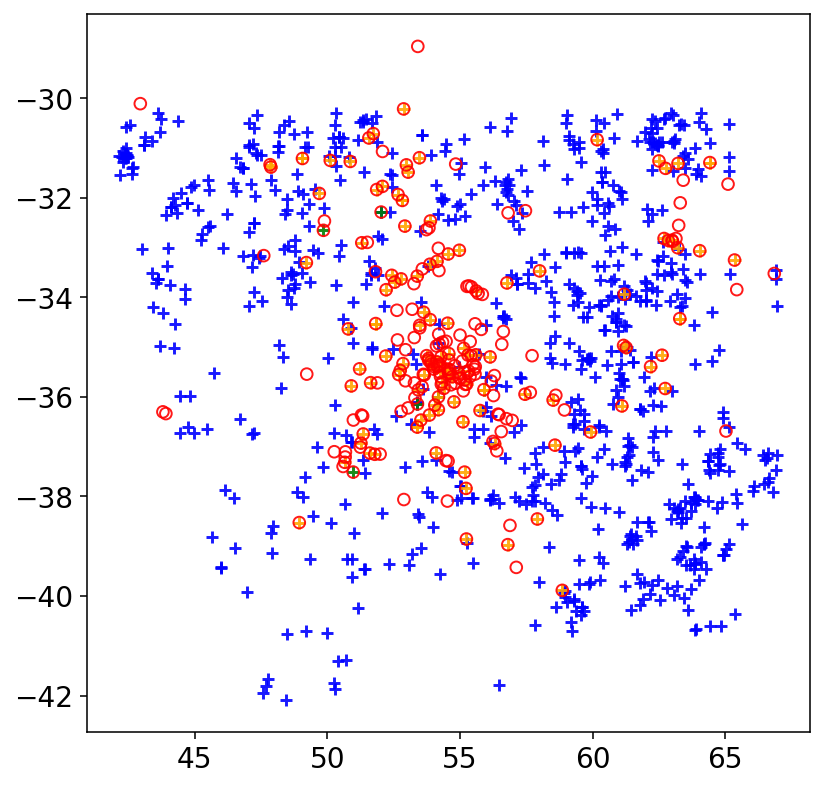

In [379]:
size = 40 # Tamaño por defecto para las fuentes de los graficos
fig, ax0 = plt.subplots ( ncols = 1, nrows = 1, figsize = (10/1.5, 10/1.5), dpi = 140 )

ax0.scatter('RA_4', 'DEC_4', data = FornaxVR, alpha = 0.9, edgecolors = 'red', facecolor = 'none', marker = 'o', zorder = 5 )
ax0.scatter('RA', 'DEC', data = test, alpha = 0.9, edgecolors = 'blue', facecolor = 'blue', marker = '+' )
ax0.scatter('RA_4', 'DEC_4', data = cm_merge_in_all_and_FornaxVR, alpha = 0.9, edgecolors = 'blue', facecolor = 'green', marker = '+' )

ax0.scatter('RA', 'DEC', data = cm_Runs_FornaxVR, alpha = 0.9, edgecolors = 'orange', facecolor = 'orange', marker = '+' )
plt.show()

In [356]:
fits = 'tablas/Literature_RUN1+RUN2_gal_mag_err_XY_mumax_flags_VR.fits'

Fornax_lit = ReadTables ( fits )
Fornax_lit['ID'] = Fornax_lit.apply(lambda x: x['ID_2'], axis = 1 )
Fornax_lit['ID'] = Fornax_lit['ID'].str.decode('utf-8') 

       Cantidad de datos: 164 (tablas/Literature_RUN1+RUN2_gal_mag_err_XY_mumax_flags_VR.fits)


In [360]:
Fornax_lit

,RA,DEC_1,Name,Morph_Legacy_Analia,Vr_NED/Maddox,e_Vr,Vr_Ref,Ag,Ar,Ai,...,FLUX_RADIUS_90_Z,FLUX_MAX_Z,SNR_WIN_Z,MU_THRESHOLD_Z,THRESHOLD_Z,MU_MAX_Z,CLASS_STAR_Z,BACKGROUND_Z,Separation,ID
0,51.788208,-37.152806,b'FCCB_446',b'E',1343.969777,44.968875,b'20096dF...C...0000J',0.056,0.039,0.029,...,24.240135,33.897701,185.002075,22.395338,0.807805,17.485388,0.028644,0.030264,0.086952,iDR4_FORNAX_RUN2_SPLUS-s29s32.00315
1,49.697917,-31.911389,b'LEDA_699440',b'Pec.',1708.817250,89.038373,b'20032dF...C...0000C',0.061,0.042,0.031,...,12.079268,1.076926,25.921165,22.902370,0.496853,21.414349,0.000311,0.000678,0.101528,iDR4_FORNAX_RUN2_SPLUS-s25s32.09567
2,65.354833,-33.249528,b'PGC_678875',b'bE',1563.118095,44.968875,b'20096dF...C...0000J',0.134,0.092,0.069,...,34.817650,1.825500,67.262016,22.832312,0.515521,20.786360,0.000321,-0.001957,0.191977,iDR4_FORNAX_RUN2_SPLUS-s26s42.00367
3,53.898700,-35.290600,b'[BAL2007]_newdw4',"b'dE,N/dIrr?(red)'",2373.000000,14.000000,b'2007A&A...464L..21B',0.048,0.033,0.025,...,8.179015,1.063838,20.469170,22.751774,0.601312,21.466625,0.000292,-0.003723,0.229892,iDR4_FORNAX_RUN1_SPLUS-s27s34.08138
4,59.924542,-36.704972,b'ESO_359-013',b'S0',1436.905453,26.081948,b'1991RC3.9.C...0000d',0.013,0.009,0.007,...,56.421394,6.511936,323.891144,22.766031,0.482920,19.435537,0.000471,-0.001236,0.260698,iDR4_FORNAX_RUN2_SPLUS-s28s37.07147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,55.037500,-35.624444,b'NGC_1427A/FCC_235',b'Jelly?',2027.796470,0.899378,b'1996ApJ...463...60B',0.040,0.028,0.021,...,86.885544,1.648937,191.522385,22.751951,0.592548,20.997805,0.000319,0.182195,7.459183,iDR4_FORNAX_RUN1_SPLUS-s28s34.11849
160,51.245833,-37.009444,b'NGC_1316C/FCC_33',b'S0(dust)',1799.954170,5.096472,b'1998A&AS..130..333T',0.072,0.050,0.037,...,53.441692,13.001971,539.790833,22.747696,0.673894,18.708790,0.000958,-0.002349,7.745248,iDR4_FORNAX_RUN2_SPLUS-s29s31.07005
161,55.341667,-33.770000,b'FCC_261',"b'dE,N'",1492.067272,41.970950,b'2001MNRAS.326.1076D',0.018,0.013,0.010,...,77.841652,2.479047,92.823662,22.734077,0.671607,20.524101,0.000319,0.004606,8.155938,iDR4_FORNAX_RUN2_SPLUS-s26s35.09988
162,49.891667,-32.466389,b'FCC_10',b'S(edge-on)',1442.901302,1.498963,b'2005ApJS..160..149S',0.053,0.037,0.027,...,66.438080,6.455389,327.773315,22.902370,0.496853,19.470007,0.000578,0.007205,8.369841,iDR4_FORNAX_RUN2_SPLUS-s25s32.11095


In [380]:
cat1 = merge_in_all
cat2 = Fornax_lit
cm_merge_in_all_and_Fornax_lit = CrossMatch(cat1, cat2, coor1 = ['RA', 'DEC'], coor2 = ['RA', 'DEC_1'], sep_min = 20 * u.arcsec)

In [381]:
cm_merge_in_all_and_Fornax_lit

,ID,RA,DEC,Prob (Fornax),Field_Runs,RA_Runs,DEC_Runs,X_IMAGE_Runs,Y_IMAGE_Runs,THETA_IMAGE_Runs,...,FLUX_RADIUS_90_Z,FLUX_MAX_Z,SNR_WIN_Z,MU_THRESHOLD_Z,THRESHOLD_Z,MU_MAX_Z,CLASS_STAR_Z,BACKGROUND_Z,Separation,ID
0,iDR4_FORNAX_RUN1_SPLUS-s24s32.16621,49.063814,-31.209234,0.95,b'SPLUS-s24s32',49.063814,-31.209234,3651.994385,3488.915283,-13.692020,...,13.202264,0.880460,20.409214,22.787136,0.537819,21.700039,0.000306,0.004093,0.829267,iDR4_FORNAX_RUN2_SPLUS-s24s32.08576
1,iDR4_FORNAX_RUN2_SPLUS-s28s35.00939,55.904322,-35.853107,0.98,b'SPLUS-s28s35',55.904322,-35.853107,9545.100586,7697.060547,61.062077,...,107.030373,17.736868,518.151001,22.362507,0.593941,18.207621,0.000717,0.852565,1.142466,iDR4_FORNAX_RUN1_SPLUS-s28s35.02066
2,iDR4_FORNAX_RUN1_SPLUS-s28s34.01225,54.192701,-35.999080,0.98,b'SPLUS-s28s34',54.192701,-35.999080,9775.666992,6739.634766,-66.453705,...,102.019760,261.204468,2618.680908,22.747999,0.598295,15.498363,0.028636,0.009701,2.430926,iDR4_FORNAX_RUN2_SPLUS-s28s34.00595
3,iDR4_FORNAX_RUN2_SPLUS-s25s32.10775,49.855654,-32.650510,0.73,b'SPLUS-s25s32',49.855654,-32.650510,2881.934814,2724.042969,87.607880,...,37.508335,0.656788,22.280611,22.902370,0.496853,21.951250,0.000304,0.008836,4.358850,iDR4_FORNAX_RUN2_SPLUS-s25s32.10750
4,iDR4_FORNAX_RUN2_SPLUS-s29s31.05387,50.971077,-37.508757,0.93,b'SPLUS-s29s31',50.971077,-37.508757,5356.775879,5499.725098,82.762032,...,93.284973,4.390797,454.562653,22.747696,0.673894,19.887455,0.000337,0.000586,4.995974,iDR4_FORNAX_RUN2_SPLUS-s29s31.05413


In [376]:
cat1 = Runs
cat2 = FornaxVR
cm_Runs_FornaxVR = CrossMatch(cat1, cat2, coor1 = ['RA', 'DEC'], coor2 = ['RA_4', 'DEC_4'], sep_min = 3 * u.arcsec)

In [377]:
cm_Runs_FornaxVR = cm_Runs_FornaxVR.loc[:, ~cm_Runs_FornaxVR.columns.duplicated()]

In [378]:
cm_Runs_FornaxVR

,ID,Field,RA,DEC,X_IMAGE,Y_IMAGE,THETA_IMAGE,ERRTHETA_IMAGE,A_IMAGE,ERRA_IMAGE,...,e_Vr,Vr_Ref,Ag,Ar,Ai,Az,RA_3,DEC_3,RA_4,DEC_4
0,iDR4_FORNAX_RUN2_SPLUS-s24s31.11020,b'SPLUS-s24s31',47.841893,-31.334909,1696.784058,2657.301514,59.582733,59.788155,8.798124,0.132888,...,0.0,2017ApJ...843...16K,0.05,0.035,0.026,0.019,47.841696,-31.33488,47.841696,-31.334880
1,iDR4_FORNAX_RUN2_SPLUS-s24s31.11251,b'SPLUS-s24s31',47.872430,-31.381912,1527.997437,2348.536865,-51.344135,-53.133644,8.179235,0.159275,...,6.895227,2006HIPAS.C...0000,0.053,0.036,0.027,0.02,47.872417,-31.382222,47.872417,-31.382222
2,iDR4_FORNAX_RUN2_SPLUS-s30s29.10128,b'SPLUS-s30s29',48.943676,-38.524572,1844.078003,7446.379395,-54.957119,-55.430016,9.196285,0.090449,...,54.862028,1996ApJS..107..201L,0.072,0.05,0.037,0.028,48.94350740394856,-38.52494586889521,48.943507,-38.524946
3,iDR4_FORNAX_RUN2_SPLUS-s24s32.08576,b'SPLUS-s24s32',49.063393,-31.209309,3654.355225,3488.432861,11.540197,11.965523,5.654506,0.099976,...,63.855803,20012dF...C...0000C,0.071,0.049,0.036,0.027,49.063583,-31.209472,49.063583,-31.209472
4,iDR4_FORNAX_RUN1_SPLUS-s24s32.16621,b'SPLUS-s24s32',49.063814,-31.209234,3651.994385,3488.915283,-13.692020,-11.396947,5.256798,0.114667,...,63.855803,20012dF...C...0000C,0.071,0.049,0.036,0.027,49.063583,-31.209472,49.063583,-31.209472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,iDR4_FORNAX_RUN1_SPLUS-s27s39.22101,b'SPLUS-s27s39',63.289551,-34.425898,1052.463989,8401.083984,72.488251,87.323357,20.639343,0.060638,...,5.99585,1994A&AS..107..265G,0.038,0.026,0.02,0.015,63.290029,-34.426321,63.290029,-34.426321
121,iDR4_FORNAX_RUN2_SPLUS-s26s41.02042,b'SPLUS-s26s41',64.041266,-33.062034,8422.975586,8689.646484,-46.270336,-44.318493,8.554208,0.139261,...,10.492737,2005ApJS..160..149S,0.085,0.059,0.044,0.032,64.041368,-33.062486,64.041368,-33.062486
122,iDR4_FORNAX_RUN2_SPLUS-s24s42.07899,b'SPLUS-s24s42',64.425238,-31.291468,5662.208496,2953.377686,48.980839,42.164612,9.827426,0.122728,...,11.392115,2005ApJS..160..149S,0.162,0.112,0.083,0.062,64.424629,-31.291529,64.424629,-31.291529
123,iDR4_FORNAX_RUN1_SPLUS-s24s42.16607,b'SPLUS-s24s42',64.424850,-31.291259,5664.377441,2954.742432,20.666109,19.434334,10.022882,0.122651,...,11.392115,2005ApJS..160..149S,0.162,0.112,0.083,0.062,64.424629,-31.291529,64.424629,-31.291529


In [385]:
cat1 = Luisa
cat2 = Fornax_lit
cm_Luisa_and_Fornax_lit = CrossMatch(cat1, cat2, coor1 = ['RA', 'DEC'], coor2 = ['RA', 'DEC_1'], sep_min = 3 * u.arcsec)

In [392]:
cm_Luisa_and_Fornax_lit['z Vr_NED/Maddox'] = cm_Luisa_and_Fornax_lit['Vr_NED/Maddox']/300000

cm_Luisa_and_Fornax_lit

,ID,Field,RA,DEC,X_IMAGE,Y_IMAGE,THETA_IMAGE,ERRTHETA_IMAGE,A_IMAGE,ERRA_IMAGE,...,FLUX_MAX_Z,SNR_WIN_Z,MU_THRESHOLD_Z,THRESHOLD_Z,MU_MAX_Z,CLASS_STAR_Z,BACKGROUND_Z,Separation,ID,z Vr_NED/Maddox
0,iDR4_FORNAX_RUN2_SPLUS-s25s32.09567,SPLUS-s25s32,49.697885,-31.911382,3737.1753,7565.3154,-23.575020,-21.062634,4.457395,0.080504,...,1.076926,25.921165,22.902370,0.496853,21.414349,0.000311,0.000678,0.101528,iDR4_FORNAX_RUN2_SPLUS-s25s32.09567,0.005696
1,iDR4_FORNAX_RUN2_SPLUS-s26s42.00367,SPLUS-s26s42,65.354818,-33.249476,10063.3610,7451.9097,-80.009400,-79.766205,10.418229,0.086882,...,1.825500,67.262016,22.832312,0.515521,20.786360,0.000321,-0.001957,0.191977,iDR4_FORNAX_RUN2_SPLUS-s26s42.00367,0.005210
2,iDR4_FORNAX_RUN2_SPLUS-s27s34.04116,SPLUS-s27s34,53.898633,-35.290681,7359.4780,2755.3953,59.659637,60.401978,3.190988,0.126379,...,1.063838,20.469170,22.751774,0.601312,21.466625,0.000292,-0.003723,0.229892,iDR4_FORNAX_RUN1_SPLUS-s27s34.08138,0.007910
3,iDR4_FORNAX_RUN2_SPLUS-s28s37.07147,SPLUS-s28s37,59.924458,-36.704946,5896.9355,2136.8760,64.025570,63.122734,20.396013,0.045778,...,6.511936,323.891144,22.766031,0.482920,19.435537,0.000471,-0.001236,0.260698,iDR4_FORNAX_RUN2_SPLUS-s28s37.07147,0.004790
4,iDR4_FORNAX_RUN2_SPLUS-s25s34.07567,SPLUS-s25s34,52.923852,-32.567627,3528.5068,3269.1208,57.857230,25.134895,6.511529,0.031320,...,17.983515,186.612411,22.366501,0.622204,18.243628,0.028237,0.006987,0.263388,iDR4_FORNAX_RUN2_SPLUS-s25s34.07567,0.003340
5,iDR4_FORNAX_RUN2_SPLUS-s27s32.08707,SPLUS-s27s32,51.218603,-35.435387,4115.4424,1809.6041,62.516250,63.563698,13.359063,0.047492,...,2.212393,196.005341,22.643593,0.251727,19.761660,0.000421,-0.001134,0.366795,iDR4_FORNAX_RUN2_SPLUS-s27s32.08707,0.004393
6,iDR4_FORNAX_RUN2_SPLUS-s26s33.11303,SPLUS-s26s33,52.216599,-33.846278,2470.2231,3555.5225,75.570564,74.803570,12.678861,0.067189,...,2.241920,101.176682,22.730717,0.501945,20.591265,0.000322,0.005718,0.447810,iDR4_FORNAX_RUN2_SPLUS-s26s33.11303,0.006767
7,iDR4_FORNAX_RUN2_SPLUS-s26s32.00287,SPLUS-s26s32,49.211086,-33.301069,10061.9280,7114.1787,-26.063500,-26.943487,8.102243,0.056702,...,4.987782,107.242340,22.664961,0.663461,19.742044,0.000430,-0.003295,0.461088,iDR4_FORNAX_RUN2_SPLUS-s26s32.00287,0.005596
8,iDR4_FORNAX_RUN2_SPLUS-s27s34.07119,SPLUS-s27s34,54.287345,-35.195037,5282.4224,3384.6719,51.346607,43.929184,25.965350,0.030203,...,32.159916,975.023743,22.749628,0.607958,17.765528,0.028507,-0.001769,0.474824,iDR4_FORNAX_RUN2_SPLUS-s27s34.07119,0.005800
9,iDR4_FORNAX_RUN1_SPLUS-s27s33.02051,SPLUS-s27s33,51.825004,-34.526527,9694.6990,7744.3354,-60.219670,-60.581745,22.225166,0.025313,...,21.073912,730.438477,22.740549,0.555672,18.186451,0.027689,0.070344,0.497094,iDR4_FORNAX_RUN1_SPLUS-s27s33.02051,0.004263


In [394]:
cat1 = Luisa
cat2 = cm_Runs_FornaxVR
cm_Luisa_and_cm_Runs_FornaxVR = CrossMatch(cat1, cat2, coor1 = ['RA', 'DEC'], coor2 = ['RA', 'DEC'], sep_min = 3 * u.arcsec)

In [400]:
cm_Luisa_and_cm_Runs_FornaxVR['z Vr_NED/Maddox'] = cm_Luisa_and_cm_Runs_FornaxVR['Vr_NED/Maddox'].astype(np.float)/300000


cm_Luisa_and_cm_Runs_FornaxVR

,ID,Field,RA,DEC,X_IMAGE,Y_IMAGE,THETA_IMAGE,ERRTHETA_IMAGE,A_IMAGE,ERRA_IMAGE,...,Vr_Ref,Ag,Ar,Ai,Az,RA_3,DEC_3,RA_4,DEC_4,z Vr_NED/Maddox
0,iDR4_FORNAX_RUN2_SPLUS-s24s31.11251,SPLUS-s24s31,47.872430,-31.381912,1527.9974,2348.5369,-51.344135,-53.133644,8.179234,0.159275,...,2006HIPAS.C...0000,0.053,0.036,0.027,0.02,47.872417,-31.382222,47.872417,-31.382222,0.005197
1,iDR4_FORNAX_RUN1_SPLUS-s24s32.16621,SPLUS-s24s32,49.063814,-31.209234,3651.9944,3488.9153,-13.692020,-11.396947,5.256798,0.114667,...,20012dF...C...0000C,0.071,0.049,0.036,0.027,49.063583,-31.209472,49.063583,-31.209472,0.003712
2,iDR4_FORNAX_RUN1_SPLUS-s24s32.16621,SPLUS-s24s32,49.063814,-31.209234,3651.9944,3488.9153,-13.692020,-11.396947,5.256798,0.114667,...,20012dF...C...0000C,0.071,0.049,0.036,0.027,49.063583,-31.209472,49.063583,-31.209472,0.003712
3,iDR4_FORNAX_RUN2_SPLUS-s26s32.00287,SPLUS-s26s32,49.211086,-33.301069,10061.9280,7114.1787,-26.063500,-26.943487,8.102243,0.056702,...,20032dF...C...0000C,0.037,0.025,0.019,0.014,49.210958,-33.301139,49.210958,-33.301139,0.005596
4,iDR4_FORNAX_RUN2_SPLUS-s25s32.09567,SPLUS-s25s32,49.697885,-31.911382,3737.1753,7565.3154,-23.575020,-21.062634,4.457395,0.080504,...,20032dF...C...0000C,0.061,0.042,0.031,0.023,49.697917,-31.911389,49.697917,-31.911389,0.005696
5,iDR4_FORNAX_RUN2_SPLUS-s24s33.04118,SPLUS-s24s33,50.111849,-31.247880,6585.1660,3237.7612,-29.261549,-28.612707,9.174809,0.048939,...,20032dF...C...0000C,0.046,0.032,0.023,0.017,50.112083,-31.248111,50.112083,-31.248111,0.006096
6,iDR4_FORNAX_RUN2_SPLUS-s27s32.05186,SPLUS-s27s32,50.792102,-34.633167,6398.8496,7061.6997,-2.283525,7.096049,5.293940,0.040559,...,2017ApJ...843...16K,0.036,0.025,0.018,0.014,50.79166666666667,-34.63305555555556,50.791667,-34.633056,0.004920
7,iDR4_FORNAX_RUN2_SPLUS-s28s32.01037,SPLUS-s28s32,50.905101,-35.778509,9544.7990,8185.4062,-62.397820,-61.918224,20.300390,0.063703,...,1991RC3.9.C...0000d,0.05,0.035,0.026,0.019,50.90416666666667,-35.77861111111111,50.904167,-35.778611,0.006077
8,iDR4_FORNAX_RUN2_SPLUS-s27s32.08707,SPLUS-s27s32,51.218603,-35.435387,4115.4424,1809.6041,62.516250,63.563698,13.359063,0.047492,...,2001MNRAS.326.1076D,0.043,0.03,0.022,0.017,51.2185,-35.435444,51.218500,-35.435444,0.004393
9,iDR4_FORNAX_RUN2_SPLUS-s29s31.07175,SPLUS-s29s31,51.267330,-36.927632,3805.4536,9300.7270,-73.413620,-72.527010,16.798210,0.071926,...,2001A&A...376...98S,0.067,0.047,0.035,0.026,51.266666666666666,-36.92777777777778,51.266667,-36.927778,0.006000


In [271]:
cm_merge_in_all_and_FornaxVR[['Name', 'Vr_NED/Maddox', 'Z_ML', 'Z_BEST', 'Prob (Fornax)']]

,Name,Vr_NED/Maddox,Z_ML,Z_BEST,Prob (Fornax)
0,LEDA_707865,1113.729137,0.0139,0.0197,0.95
1,FCC_9,1751.087992,0.0193,0.0191,0.73
2,NGC_1386/FCC_179,867.899288,-99.0000,0.0065,0.98
3,NGC_1436/FCC_290,1387.139897,-99.0000,0.0215,0.98


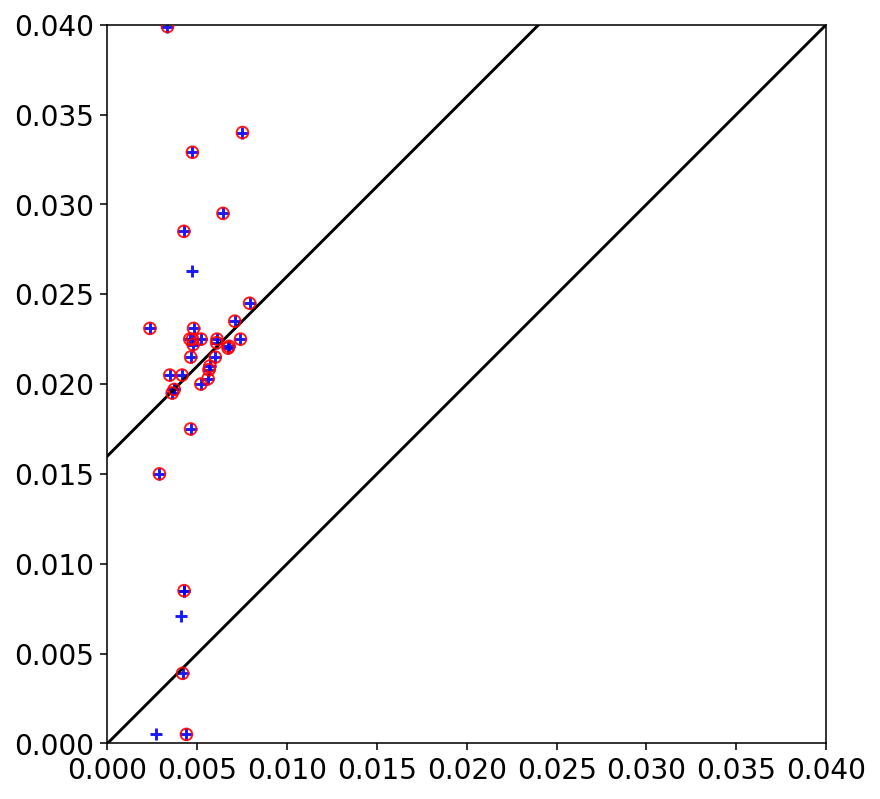

In [415]:
size = 40 # Tamaño por defecto para las fuentes de los graficos
fig, ax0 = plt.subplots ( ncols = 1, nrows = 1, figsize = (10/1.5, 10/1.5), dpi = 140 )

ax0.scatter ( 'z Vr_NED/Maddox', 'Z_BEST', data = cm_Luisa_and_Fornax_lit[cm_Luisa_and_Fornax_lit['Z_ML'] > 0], alpha = 0.9, edgecolors = 'red', facecolor = 'none', marker = 'o', zorder = 5 )
ax0.scatter ( 'z Vr_NED/Maddox', 'Z_BEST', data = cm_Luisa_and_cm_Runs_FornaxVR[cm_Luisa_and_cm_Runs_FornaxVR['Z_ML'] > 0], alpha = 0.9, edgecolors = 'blue', facecolor = 'blue', marker = '+' )

ax0.axline ( (0, 0), slope = 1, color = 'black' )
ax0.axline ( (0, 0.016), slope = 1, color = 'black' )

ax0.set_xlim(0,0.04)
ax0.set_ylim(0,0.04)
ax0.set_aspect ( 1.0/ax0.get_data_ratio(), adjustable = 'box' )
plt.show()


# Cross-match entre Luisa y Erik

In [423]:
cat1 = Luisa
cat2 = SpecZ
cm_Luisa_and_SpecZ = CrossMatch(cat1, cat2, coor1 = ['RA', 'DEC'], coor2 = ['RA', 'DEC'], sep_min = 1 * u.arcsec)

In [429]:
cm_Luisa_and_SpecZ['RA']

,RA,RA
0,42.994923,42.994990
1,55.972171,55.972000
2,42.835505,42.835458
3,59.235833,59.235647
4,56.596705,56.596667
...,...,...
10998,50.843591,50.843607
10999,50.019353,50.019366
11000,48.512793,48.512878
11001,46.481232,46.481217


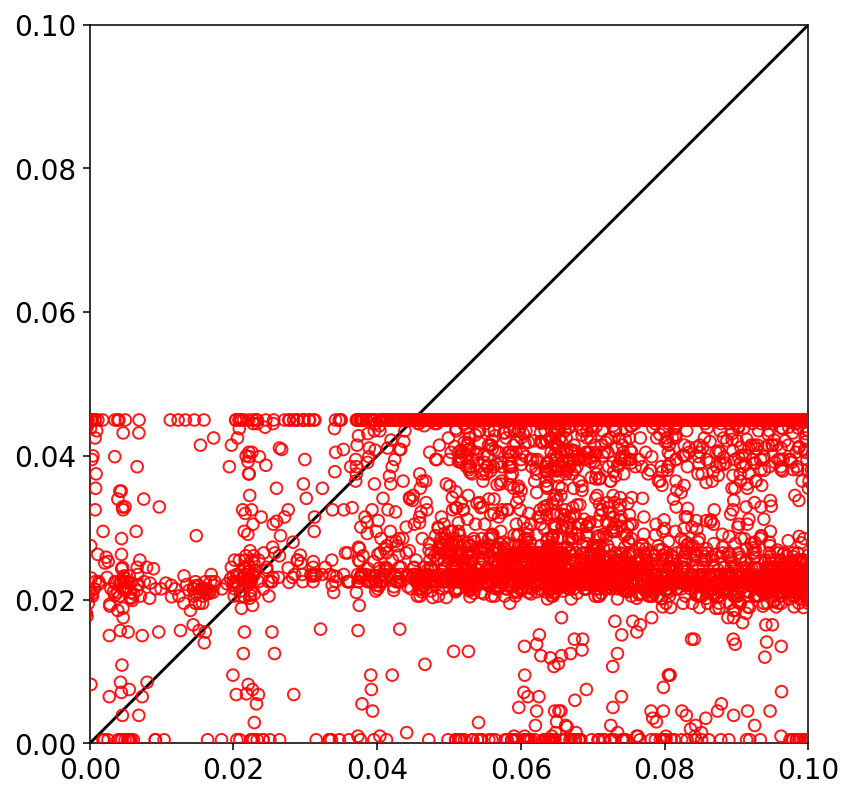

In [430]:
size = 40 # Tamaño por defecto para las fuentes de los graficos
fig, ax0 = plt.subplots ( ncols = 1, nrows = 1, figsize = (10/1.5, 10/1.5), dpi = 140 )

ax0.scatter ( 'z', 'Z_BEST', data = cm_Luisa_and_SpecZ[cm_Luisa_and_SpecZ['Z_BEST'] > 0], alpha = 0.9, edgecolors = 'red', facecolor = 'none', marker = 'o', zorder = 5 )

ax0.axline ( (0, 0), slope = 1, color = 'black' )

ax0.set_xlim(0,0.1)
ax0.set_ylim(0,0.1)
ax0.set_aspect ( 1.0/ax0.get_data_ratio(), adjustable = 'box' )
plt.show()

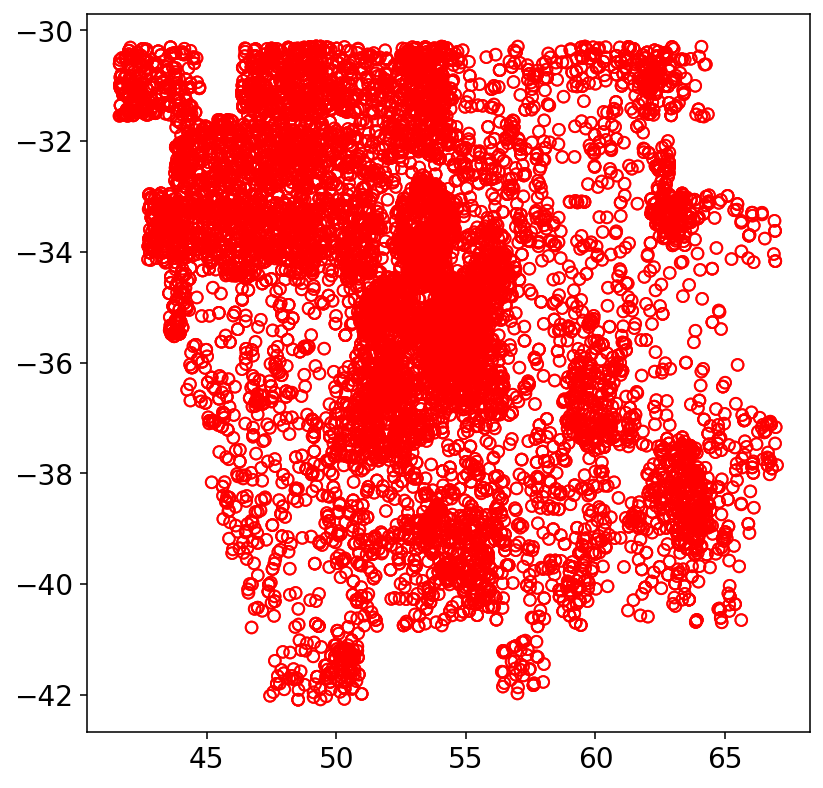

In [427]:
size = 40 # Tamaño por defecto para las fuentes de los graficos
fig, ax0 = plt.subplots ( ncols = 1, nrows = 1, figsize = (10/1.5, 10/1.5), dpi = 140 )

ax0.scatter ( 'RA', 'DEC', data = cm_Luisa_and_SpecZ[cm_Luisa_and_SpecZ['Z_BEST'] > 0], alpha = 0.9, edgecolors = 'red', facecolor = 'none', marker = 'o', zorder = 5 )

plt.show()